Importing the essential libraries for this project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Next step is to load the data (stored in .csv) from my Google Drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Reservoir Characterization/Assignment #3_CSV File.csv"

In [ ]:
df = pd.read_csv(path) 
df 

,k_md,Phi
0,1.8710,9.20
1,4.3500,9.30
2,3.1070,11.54
3,3.0313,4.30
4,3.0476,3.60
...,...,...
58,0.0004,6.00
59,0.0003,4.70
60,0.0003,4.50
61,0.0001,5.70


Now, we define the pore-size classes ($r_p35$) used



In [ ]:
rp35_a = 20
rp35_b = 10
rp35_c = 4
rp35_d = 2
rp35_e = 1
rp35_f = 0.5
rp35_g = 0.2
rp35_h = 0.1
rp35_i = 0.04
rp35_j = 0.025
rp35_k = 0.014

Recall $r_p35$ is given by the equation:

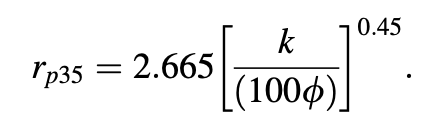

From the equation, we can calculate, using python, the permeability at different pore-size classes. 

However, we must first state an interval for the porosity values.

Porosity (Φ) = Phi

In [ ]:
porosity = np.linspace(0.1, 30, 120)

porosity

array([ 0.1       ,  0.3512605 ,  0.60252101,  0.85378151,  1.10504202,
        1.35630252,  1.60756303,  1.85882353,  2.11008403,  2.36134454,
        2.61260504,  2.86386555,  3.11512605,  3.36638655,  3.61764706,
        3.86890756,  4.12016807,  4.37142857,  4.62268908,  4.87394958,
        5.12521008,  5.37647059,  5.62773109,  5.8789916 ,  6.1302521 ,
        6.38151261,  6.63277311,  6.88403361,  7.13529412,  7.38655462,
        7.63781513,  7.88907563,  8.14033613,  8.39159664,  8.64285714,
        8.89411765,  9.14537815,  9.39663866,  9.64789916,  9.89915966,
       10.15042017, 10.40168067, 10.65294118, 10.90420168, 11.15546218,
       11.40672269, 11.65798319, 11.9092437 , 12.1605042 , 12.41176471,
       12.66302521, 12.91428571, 13.16554622, 13.41680672, 13.66806723,
       13.91932773, 14.17058824, 14.42184874, 14.67310924, 14.92436975,
       15.17563025, 15.42689076, 15.67815126, 15.92941176, 16.18067227,
       16.43193277, 16.68319328, 16.93445378, 17.18571429, 17.43

In [ ]:
df_new = pd.DataFrame(data=porosity, columns=['Porosity (Φ)'])

df_new

,Porosity (Φ)
0,0.100000
1,0.351261
2,0.602521
3,0.853782
4,1.105042
...,...
115,28.994958
116,29.246218
117,29.497479
118,29.748739


Now we define a function for permeability;

Permeability = k

In [ ]:
def k (Phi, rp35):
  k = Phi * ((rp35/2.665) ** (1/0.45))
  return k

In [ ]:
df_new['k_rp35_a'] = k(df_new['Porosity (Φ)'], rp35_a)
df_new['k_rp35_b'] = k(df_new['Porosity (Φ)'], rp35_b)
df_new['k_rp35_c'] = k(df_new['Porosity (Φ)'], rp35_c)
df_new['k_rp35_d'] = k(df_new['Porosity (Φ)'], rp35_d)
df_new['k_rp35_e'] = k(df_new['Porosity (Φ)'], rp35_e)
df_new['k_rp35_f'] = k(df_new['Porosity (Φ)'], rp35_f)
df_new['k_rp35_g'] = k(df_new['Porosity (Φ)'], rp35_g)
df_new['k_rp35_h'] = k(df_new['Porosity (Φ)'], rp35_h)
df_new['k_rp35_i'] = k(df_new['Porosity (Φ)'], rp35_i)
df_new['k_rp35_j'] = k(df_new['Porosity (Φ)'], rp35_j)
df_new['k_rp35_k'] = k(df_new['Porosity (Φ)'], rp35_k)

df_new

,Porosity (Φ),k_rp35_a,k_rp35_b,k_rp35_c,k_rp35_d,k_rp35_e,k_rp35_f,k_rp35_g,k_rp35_h,k_rp35_i,k_rp35_j,k_rp35_k
0,0.100000,8.814222,1.888985,0.246557,0.052840,0.011324,0.002427,0.000317,0.000068,0.000009,0.000003,8.595887e-07
1,0.351261,30.960879,6.635257,0.866057,0.185606,0.039777,0.008525,0.001113,0.000238,0.000031,0.000011,3.019396e-06
2,0.602521,53.107536,11.381529,1.485558,0.318371,0.068230,0.014623,0.001909,0.000409,0.000053,0.000019,5.179203e-06
3,0.853782,75.254194,16.127801,2.105058,0.451137,0.096684,0.020720,0.002704,0.000580,0.000076,0.000027,7.339010e-06
4,1.105042,97.400851,20.874073,2.724558,0.583903,0.125137,0.026818,0.003500,0.000750,0.000098,0.000034,9.498817e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
115,28.994958,2555.679824,547.710288,71.489090,15.320898,3.283437,0.703677,0.091846,0.019684,0.002569,0.000904,2.492374e-04
116,29.246218,2577.826481,552.456560,72.108590,15.453664,3.311890,0.709774,0.092642,0.019854,0.002591,0.000912,2.513972e-04
117,29.497479,2599.973139,557.202832,72.728090,15.586429,3.340343,0.715872,0.093438,0.020025,0.002614,0.000920,2.535570e-04
118,29.748739,2622.119796,561.949104,73.347591,15.719195,3.368796,0.721970,0.094234,0.020195,0.002636,0.000928,2.557168e-04


We have obtained the data we need to create the plot, so now we create the plot

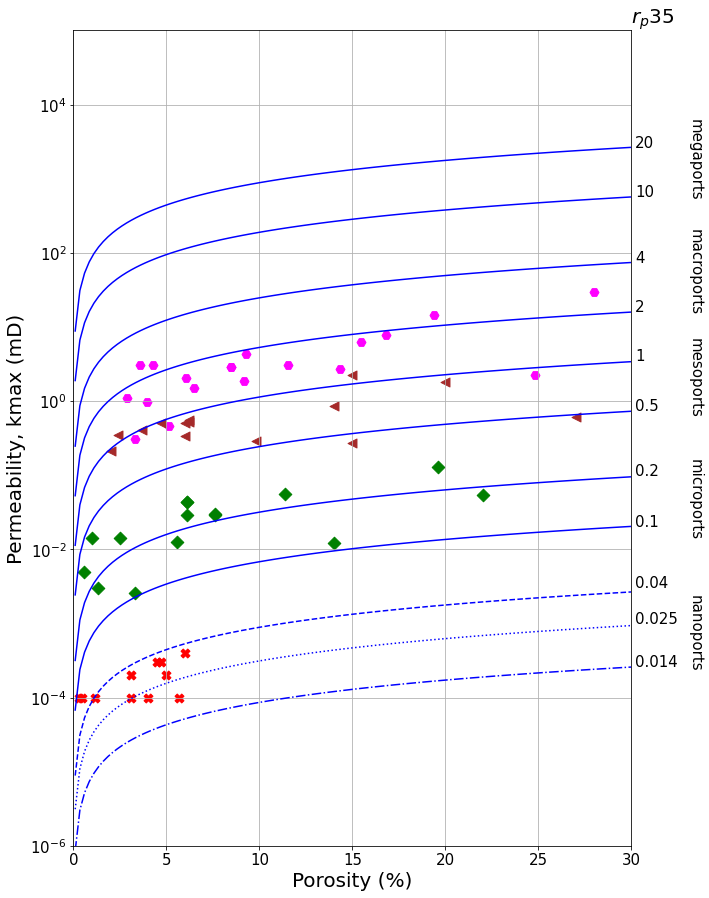

In [ ]:
plt.figure(figsize=(10,15))
plt.plot(df_new['Porosity (Φ)'], df_new['k_rp35_a'], color= 'blue', linestyle= 'solid')
plt.plot(df_new['Porosity (Φ)'], df_new['k_rp35_b'], color= 'blue', linestyle= 'solid')
plt.plot(df_new['Porosity (Φ)'], df_new['k_rp35_c'], color= 'blue', linestyle= 'solid')
plt.plot(df_new['Porosity (Φ)'], df_new['k_rp35_d'], color= 'blue', linestyle= 'solid')
plt.plot(df_new['Porosity (Φ)'], df_new['k_rp35_e'], color= 'blue', linestyle= 'solid')
plt.plot(df_new['Porosity (Φ)'], df_new['k_rp35_f'], color= 'blue', linestyle= 'solid')
plt.plot(df_new['Porosity (Φ)'], df_new['k_rp35_g'], color= 'blue', linestyle= 'solid')
plt.plot(df_new['Porosity (Φ)'], df_new['k_rp35_h'], color= 'blue', linestyle= 'solid')
plt.plot(df_new['Porosity (Φ)'], df_new['k_rp35_i'], color= 'blue', linestyle= 'dashed')
plt.plot(df_new['Porosity (Φ)'], df_new['k_rp35_j'], color= 'blue', linestyle= 'dotted')
plt.plot(df_new['Porosity (Φ)'], df_new['k_rp35_k'], color= 'blue', linestyle= 'dashdot')

plt.scatter(df['Phi'][:19], df['k_md'][:19], s= 80, marker= 'H', color= 'magenta')
plt.scatter(df['Phi'][19:34], df['k_md'][19:34], s= 80, marker= 'D', color= 'green')
plt.scatter(df['Phi'][34:48], df['k_md'][34:48], s= 80, marker= '<', color= 'brown')
plt.scatter(df['Phi'][48:], df['k_md'][48:], s= 80, marker= 'X', color= 'red')

plt.tick_params(axis= 'both', which= 'major', labelsize= 15)

plt.text(30, 10**5.1, "$r_p35$", fontsize= 20)
plt.text(30.2, 2645, "20", fontsize= 15)
plt.text(30.2, 567, "10", fontsize= 15)
plt.text(30.2, 74, "4", fontsize= 15)
plt.text(30.2, 16, "2", fontsize= 15)
plt.text(30.2, 3.5, "1", fontsize= 15)
plt.text(30.2, 0.75, "0.5", fontsize= 15)
plt.text(30.2, 0.1, "0.2", fontsize= 15)
plt.text(30.2, 0.02, "0.1", fontsize= 15)
plt.text(30.2, 0.003, "0.04", fontsize= 15)
plt.text(30.2, 0.001, "0.025", fontsize= 15)
plt.text(30.2, 2.6e-04, "0.014", fontsize= 15)

plt.text(33, 567, "megaports", rotation= -90, fontsize= 15)
plt.text(33, 16, "macroports", rotation= -90, fontsize= 15)
plt.text(33, 0.65, "mesoports", rotation= -90, fontsize= 15)
plt.text(33, 0.015, "microports", rotation= -90, fontsize= 15)
plt.text(33, 2.5e-04, "nanoports", rotation= -90, fontsize= 15)

plt.yscale('log')
plt.ylabel('Permeability, kmax (mD)', fontsize= 20)
plt.xlabel('Porosity (%)', fontsize= 20)
plt.grid()
plt.ylim(1e-6, 1e5)
plt.xlim(0, 30)
plt.grid(True, which= "both", linestyle= 'solid')
plt.show()